# **Lab 6: Runge-Kutta 2nd Order Method for Ordinary Differential Equations**<br>

Ordinary Differential Equation (ODE) is a differential equation consisting of one or more functions of a single independent variable and the derivatives of those functions. Finding derivatives analytically is a complex procedure, involving a lot of rules. Computers and calculators find derivatives using some sort of numerical methods. Here, our target is to estimate a function at discrete points given its differential equation using the **Runge-Kutta 2nd Order method**. An important thing to note here is that this method can only solve first order ODE of the form $$ \frac{dy}{dx}=f(x,y), y(x_0)=y_0 $$

In today's lab, we will be implementing the **Runge-Kutta 2nd Order method** for solving a first order ODE in python. Refer to the example in the lecture slide.

The following is the problem you need to solve.
<br>
A ball at $1200K$ is allowed to cool down in air at an ambient temperature of $300K$. Assuming heat is lost only due to radiation, the differential equation for the temperature of the ball is given by $$\frac{d\theta}{dt}=-2.2067\times 10^{-12} (\theta^4 - 81 \times 10^8), y(0)=1,\theta(0)=1200K$$ where $\theta$ is in $K$ and $t$ in seconds. Find the temperature at $t=480$ seconds using Runge-Kutta 2nd Order method. Assume a step size of $h=240$ seconds. Compare with the exact value.

##Task 1
Implement the bivariate function $f(t, \theta)$ and the algorthim for Runge-Kutta 2nd Order method. Use the **Heun's method** assumption $\displaystyle a_2 = \frac{1}{2}$.
$$\theta_{i+1} = \theta_i + \left( \frac{1}{2}k_1 +  \frac{1}{2}k_2\right)h$$
$$k_1 = f(t_i,\theta_i)$$
$$k_2 = f(t_i + h, \theta_i + k_1h)$$ where $h=t_{i+1}-t_i$ is the step size.

In [48]:
def f(t, theta):
    #Write your code here.
    res = -2.2067e-12 * (theta**4 - 81e8)
    return res

def RungeKutta2(x_0, y_0, h, x):
    #Write your code here.
    t = x_0
    theta = y_0

    while t < x:
        k1 = f(t, theta)
        k2 = f(t + h, theta + k1 * h)
        theta = theta + (0.5 * k1 + 0.5 * k2) * h
        t += h

    return theta

In [43]:
print(f'Temperature at t = 480s with step size h = 240s is {RungeKutta2(0,1200,240,480):.2f}K')

Temperature at t = 480s with step size h = 240s is 584.27K


Your answer should be $\approx 584.27K$.

##Task 2
Calculate the exact solution of the ODE. It is the root of the nonlinear equation
$$ 0.92593\ln\left( \frac{\theta-300}{\theta+300} \right) - 1.8519\tan^{-1}(0.333\times10^{-2}\theta) = -0.22067\times 10^{-3}t - 2.9282 $$ at $t=480$ seconds.

You can use your own root-finding algorithm or you can use the `fsolve()` function from the `scipy` package. (https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fsolve.html)

In [49]:
import numpy as np
from scipy.optimize import fsolve
def exact_solution():
    func = lambda theta: 0.92593 * np.log((theta - 300) / (theta + 300)) - 1.8519 * np.arctan(0.3333e-2 * theta) + 0.22067e-3 * 480 + 2.9282
    theta_exact = fsolve(func, 650)[0]  # Initial guess is 650K
    return theta_exact

theta_exact = exact_solution()
print(f'Exact Temperature at t = 480s: {theta_exact:.2f}K')

Exact Temperature at t = 480s: 647.56K


The exact value should be $\theta_{exact} \approx 647.57K$.

Now, approximate the value of $\theta(480)$ using different step sizes, such as $480, 240, 120, 60,$ and $30$. Calculate the Global Truncation Error $E_t$ and the Absolute Relative True Error $|\epsilon_t|\%$ in each case.

In [50]:
# Write your code here.
# Step sizes to test
step_sizes = [480, 240, 120, 60, 30]
results = []

for h in step_sizes:
    theta_approx = RungeKutta2(0, 1200, h, 480)
    Et = theta_exact - theta_approx
    abs_rel_error = abs(Et / theta_exact) * 100
    results.append((h, theta_approx, Et, abs_rel_error))

print("\nStep size (h) | θ(480)   | Et        | |εt| %")
print("------------------------------------------------")
for h, theta_approx, Et, abs_rel_error in results:
    print(f"{h:<12} | {theta_approx:<8.2f} | {Et:<10.4f} | {abs_rel_error:<10.5f}")


Step size (h) | θ(480)   | Et        | |εt| %
------------------------------------------------
480          | -393.87  | 1041.4303  | 160.82355 
240          | 584.27   | 63.2923    | 9.77396   
120          | 651.35   | -3.7883    | 0.58501   
60           | 649.91   | -2.3528    | 0.36333   
30           | 648.21   | -0.6443    | 0.09950   


Your values should approximately match the values of this table.
<br>
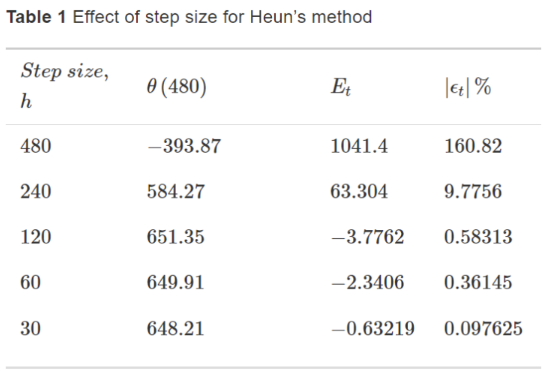

## Task 3
Generate a Temperature $(\theta)$ vs Step size $(h)$ plot which portrays the effect of step size in Runge-Kutta 2nd Order method. Use a different marker to represent the exact value.

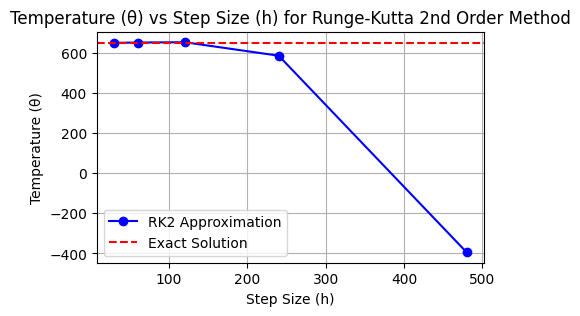

In [51]:
import matplotlib.pyplot as plt
# Write your code here.
h_values = [r[0] for r in results]
theta_values = [r[1] for r in results]

plt.figure(figsize=(5, 3))
plt.plot(h_values, theta_values, marker='o', linestyle='-', color='b', label='RK2 Approximation')
plt.axhline(y=theta_exact, color='r', linestyle='--', label='Exact Solution')
plt.xlabel('Step Size (h)')
plt.ylabel('Temperature (θ)')
plt.title('Temperature (θ) vs Step Size (h) for Runge-Kutta 2nd Order Method')
plt.legend()
plt.grid(True)
plt.show()

Your graph should look something like,
<br>
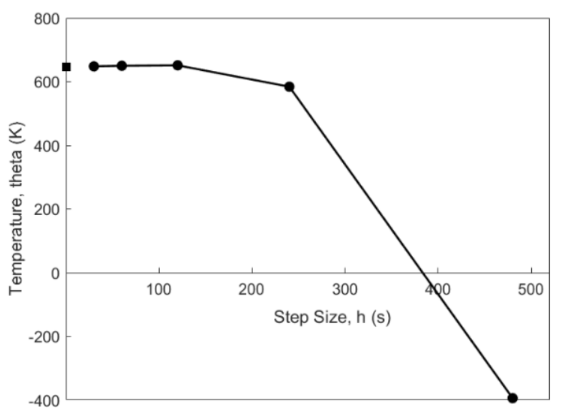

Genrerate a Temperature $\theta$ vs Time $t$ plot that compares the Runge-Kutta 2nd Order method approximations for different step sizes with the exact solution.

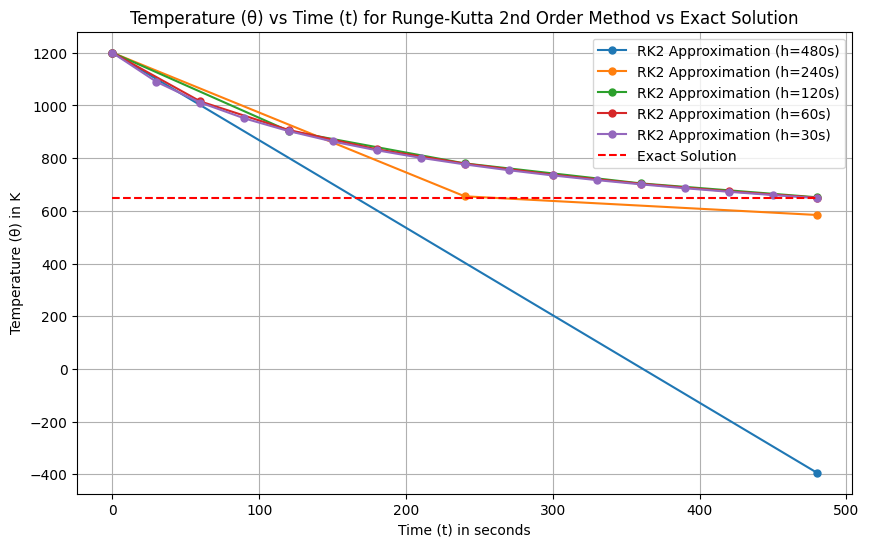

In [47]:
# Write your code here.
def RungeKutta2(x_0, y_0, h, x):
    t = x_0
    theta = y_0
    times = [t]
    temperatures = [theta]

    while t < x:
        k1 = f(t, theta)
        k2 = f(t + h, theta + k1 * h)
        theta = theta + (0.5 * k1 + 0.5 * k2) * h
        t += h
        times.append(t)
        temperatures.append(theta)

    return times, temperatures

time_values = np.linspace(0, 480, 100)

theta_exact_value = exact_solution()

step_sizes = [480, 240, 120, 60, 30]

plt.figure(figsize=(10, 6))

for h in step_sizes:
    times, temperatures = RungeKutta2(0, 1200, h, 480)
    plt.plot(times, temperatures, label=f'RK2 Approximation (h={h}s)', marker='o', linestyle='-', markersize=5)

plt.plot(time_values, [theta_exact_value for _ in time_values], color='r', linestyle='--', label='Exact Solution')

plt.xlabel('Time (t) in seconds')
plt.ylabel('Temperature (θ) in K')
plt.title('Temperature (θ) vs Time (t) for Runge-Kutta 2nd Order Method vs Exact Solution')
plt.legend()
plt.grid(True)

plt.show()

Your graph should look something like,
<br>
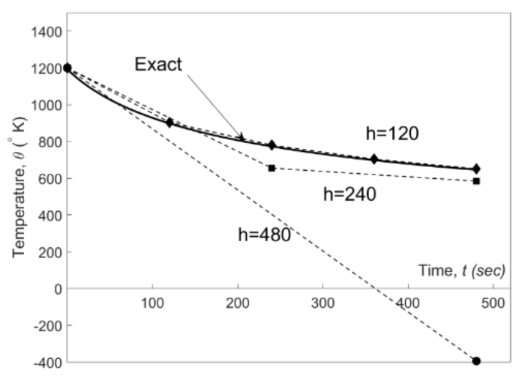